# MIS780 Advanced AI For Business - Assignment 2 - T2 2022

## Example 2:  Convolutional Neural Network - Classification of Cats and Dogs

**Student Name:** Pranitha Gaddam

**Student ID:** 221183244

## Table of Content
   
1. [Data Description](#cell_Preparation)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Model Construction](#cell_model)

4. [Model Execution](#cell_execution)
 
5. [Experiments Report](#cell_report)



## Executive Summary

This notebook proposes a problem of classification between dogs and cats. Classification predictive modelling involves assigning a class label to the input examples. In this instance, the business problem revolves around implementing a neural network to classify multiple images into dogs and cats. The proposed model is Convolutional Neural Network, which is commonly applied to analyse visual imagery. CNN's are mostly regularized versions of multilayer perceptrons. The CNN architecture usually involves convolution kernels which transforms the images into feature maps which are flattened to nodes, as a fully connected layer, which represents the classification scores. Moreover, we perform a binary crossentropy classification since there are only two classes in this scenario. The following steps include data preprocessing of the images dataset that has been downloadded from Kaggle datasets using the API token. In data preprocessing, we create seperate directories for train, validation and test sets to construct a CNN model, which predicts on the test set. Finally, I have presented the test and train accuracy score alongwith the plots representing model experiments.   

<a id = "cell_Preparation"></a>
## 1. Data Description

The dataset is downloaded from Kaggle and contains images of cats and dogs. Through data preprocessing, I have created a new folder called subset which has three subfolders : train, test and validation. Each folder consists of images:
Train folder : Cat (1000) , Dogs(1000)
Validation folder : Cat(500), Dogs(500)
Test folder : Cat (500) , Dogs (500)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# ignore warning messages
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Lambda, Dense, Flatten,Dropout
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import zipfile

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "pranithagaddam"
os.environ['KAGGLE_KEY'] = "9824503f7b0bd0cf084cbadef33a6276"
!kaggle competitions download -c dogs-vs-cats

 99% 800M/812M [00:04<00:00, 229MB/s]
100% 812M/812M [00:04<00:00, 192MB/s]


In [3]:
#Upload data 
from zipfile import ZipFile

file_name = "/content/dogs-vs-cats.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
#Upload data 
from zipfile import ZipFile

file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
#Upload data 
from zipfile import ZipFile

file_name = "/content/test1.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [6]:
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

original_dataset_dir = '/content/train'
base_dir = '/content/subset'
os.mkdir(base_dir)

25000


<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

In [7]:
train_df = pd.DataFrame({"file": os.listdir("/content/train")})
train_df["label"] = train_df["file"].apply(lambda x: x.split(".")[0])

train_df.head()

,file,label
0,dog.7752.jpg,dog
1,cat.11304.jpg,cat
2,dog.6775.jpg,dog
3,cat.12407.jpg,cat
4,dog.9887.jpg,dog


In [8]:
test_df = pd.DataFrame({"file": os.listdir("/content/test1")})

test_df.head()

,file
0,1308.jpg
1,3710.jpg
2,9480.jpg
3,5834.jpg
4,12113.jpg


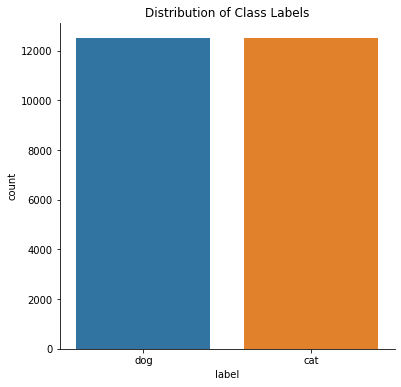

In [9]:
fig, ax = plt.subplots(figsize = (6, 6))

sns.countplot(x = "label", data = train_df, ax = ax)

ax.set_title("Distribution of Class Labels")
sns.despine()
plt.show()

The countplot above shows an equal distribution of cats and dogs in the dataset. 

In [10]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [11]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [12]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


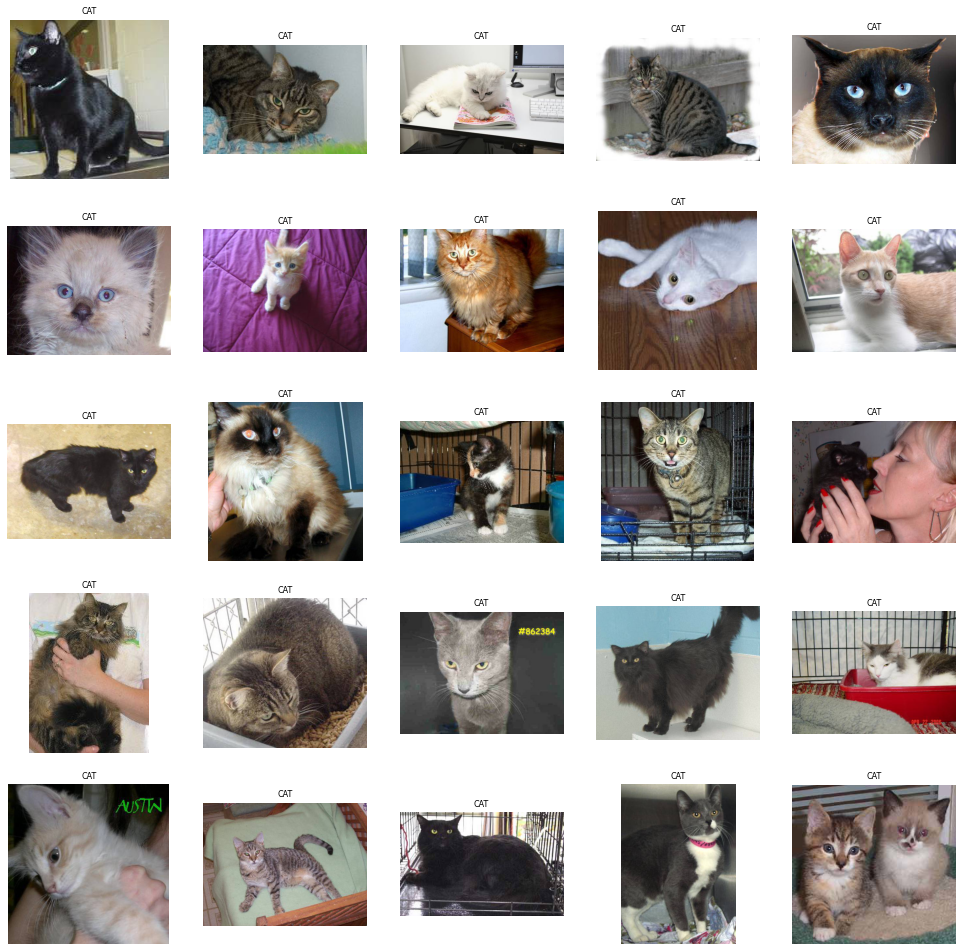

In [13]:
W = 5
H = 5
fig, ax = plt.subplots(W, H, figsize = (17,17))
ax = ax.ravel() # flatten the matrix into array
for i in np.arange(0, W * H): 
    label ='CAT'
    class_dir = os.path.join("/content/subset/train/cats")
    # Select a random image
    image = random.choice(os.listdir(class_dir))
    # read and display an image with the selected index    
    img = plt.imread(os.path.join(class_dir,image))
    ax[i].imshow( img )
    ax[i].set_title(label, fontsize = 8) # the label
    ax[i].axis('off')

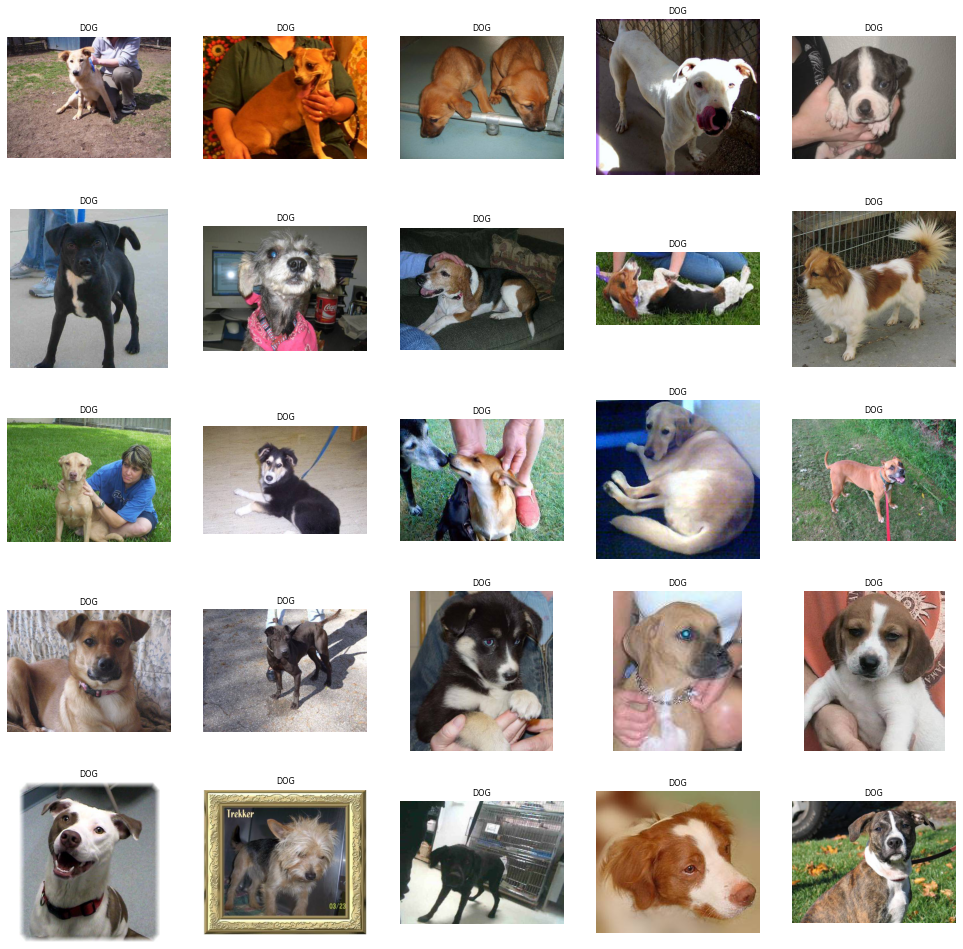

In [14]:
W = 5
H = 5
fig, ax = plt.subplots(W, H, figsize = (17,17))
ax = ax.ravel() # flatten the matrix into array
for i in np.arange(0, W * H): 
    label ='DOG'
    class_dir = os.path.join("/content/subset/train/dogs")
    # Select a random image
    image = random.choice(os.listdir(class_dir))
    # read and display an image with the selected index    
    img = plt.imread(os.path.join(class_dir,image))
    ax[i].imshow( img )
    ax[i].set_title(label, fontsize = 8) # the label
    ax[i].axis('off')

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                      target_size=(150, 150),
                                                      batch_size=20,
                                                      class_mode='binary')



validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                          target_size=(150, 150),
                                                          batch_size=20,
                                                          class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


We import ImageDataGenerator for data augmentation to increase the generalisability of the model. 

<a id = "cell_model"></a>
## 3. Model Construction

The model used below is Sequential model which has 4 Convolutional 2D layers having 32 kernels, 64 kernels, and 128 kernels. It also has 4 Max pooling layers which collects information from preceding convolutional layers. 1 flattening, 1 Dropout and 2 output layers with the activation function 'relu' and 'sigmoid'. 

In [16]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Started with the image size and increasing the number of kernels accordingly which are 32, 64, 128. The model output gives 3,453,121 parameters to be considered. The output shape determines the shape of the feature maps, for instance, conv2d_1 has an output shape of (None, 72, 72, 64) with parameters 18496 which is calculated as (3 x 3 x 32 + 1)* 32 * 64.  

We further experiment with RMSprop optimizer with a learning rate of 1e-4 to search for the best set of network weights and biases.The error function is called loss to guide the optimiser, in this case, it is binary crossentropy for binary classification. Other performance metrics is also used such as accuracy. 

In [17]:
import tensorflow as tf
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

<a id = "cell_execution"></a>
## 4. Model Execution

In [18]:
history = model.fit_generator(train_generator,
                                steps_per_epoch=100,
                                epochs=20,
                                validation_data= validation_generator,
                                validation_steps=10)

Epoch 1/20
100/100 [==============================] - 26s 144ms/step - loss: 0.6956 - acc: 0.4970 - val_loss: 0.6860 - val_acc: 0.5900
Epoch 2/20
100/100 [==============================] - 15s 145ms/step - loss: 0.6865 - acc: 0.5395 - val_loss: 0.6715 - val_acc: 0.5550
Epoch 3/20
100/100 [==============================] - 14s 144ms/step - loss: 0.6719 - acc: 0.5775 - val_loss: 0.7225 - val_acc: 0.4950
Epoch 4/20
100/100 [==============================] - 14s 143ms/step - loss: 0.6603 - acc: 0.5850 - val_loss: 0.6091 - val_acc: 0.6900
Epoch 5/20
100/100 [==============================] - 14s 143ms/step - loss: 0.6367 - acc: 0.6265 - val_loss: 0.6065 - val_acc: 0.6500
Epoch 6/20
100/100 [==============================] - 14s 142ms/step - loss: 0.6210 - acc: 0.6510 - val_loss: 0.6196 - val_acc: 0.6450
Epoch 7/20
100/100 [==============================] - 17s 167ms/step - loss: 0.6105 - acc: 0.6670 - val_loss: 0.5545 - val_acc: 0.7050
Epoch 8/20
100/100 [==============================] - 1

<a id = "cell_report"></a>
## 5. Experiments Report

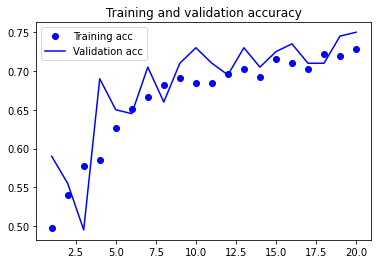

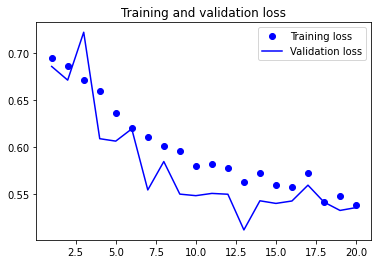

In [19]:
model.save('cats_and_dogs_small_1.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Both the training and validation accuracy gets better and better with increasing number of epochs. Whereas, both training and validation loss has gone down, benefits of using Dropout layer and avoid overfitting.

In [21]:
# Evaluate on training data
train_score = model.evaluate(train_generator, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(validation_generator, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.5188
Train accuracy: 0.7475 

Test loss: 0.5191
Test accuracy: 0.74


We can see that the test accuracy and the train accuracy is similar, likewise with Train loss and test loss.

In [22]:
from keras.preprocessing import image
#to predict new images 
def predict_image(imagepath, model):
    predict = image.load_img(imagepath, target_size = (150, 150))   
    predict_modified = image.img_to_array(predict)
    predict_modified = predict_modified / 255
    predict_modified = np.expand_dims(predict_modified, axis = 0)
    result = model.predict(predict_modified)
    print(result[0][0]) 
    if result[0][0] >= 0.5:
        prediction = 'dog'
        probability = result[0][0]
        print("probability = " + str(probability))
        print("Prediction = " + prediction)
    else:
        prediction = 'cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)
    print(result)

In [23]:
predict_image('/content/subset/test/cats/cat.1500.jpg', model)

0.035893787
probability = 0.9641062133014202
Prediction = cat
[[0.03589379]]


The above experimental results indicate whether an image is a cat or dog based on the threshold >= 0.5. Therefore, the model gives an accurate prediction with a probability of 0.96 of the cat image. Overall, we can notice based on the training and test accuracy and our prediction accuracy that CNN models help in binary classification between cats and dogs. 